# Ex - GroupBy

### Introduction:

GroupBy can be summarizes as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [12]:
%matplotlib inline
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv', sep=',')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


### Step 4. Which continent drinks more beer on average?

In [10]:
drinks.groupby(by = 'continent')['beer_servings'].mean().sort_values(ascending = False)

continent
EU    193.777778
SA    175.083333
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

In [9]:
drinks.groupby(by = 'continent')['beer_servings'].mean().sort_values(ascending = False).head(1)

continent
EU    193.777778
Name: beer_servings, dtype: float64

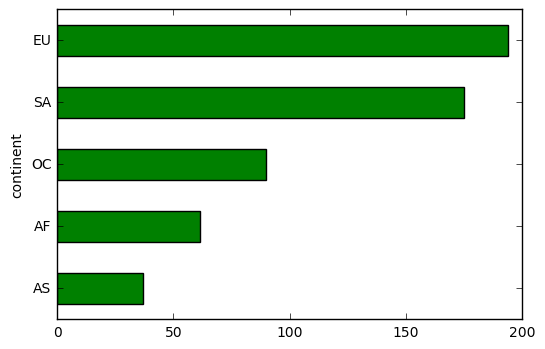

In [14]:
drinks.groupby(by = 'continent')['beer_servings'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'g')

### Step 5. For each continent print the statistics for wine consumption.

In [30]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [15]:
drinks.groupby(by = 'continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [18]:
drinks.groupby(by = 'continent')['wine_servings'].describe().sort_values(by = ['mean', 'std'], ascending = [True, False])

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0


### Step 6. Print the mean alcoohol consumption per continent for every column

In [21]:
drinks.groupby(by = 'continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [20]:
drinks.groupby(by = 'continent')['total_litres_of_pure_alcohol'].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### Step 7. Print the median alcoohol consumption per continent for every column

In [22]:
drinks.groupby(by = 'continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [31]:
drinks.groupby(by = 'continent')['spirit_servings'].agg( ['mean', 'min', 'max'] )

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


In [26]:
import numpy as np

In [28]:
drinks.groupby(by = 'continent')['spirit_servings'].agg( [np.mean, min, max] )

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


In [29]:
drinks.groupby(by = 'continent').agg( [np.mean, min, max] )

beer_servings          spirit_servings          wine_servings      \
                   mean min  max            mean min  max          mean min   
continent                                                                     
AF            61.471698   0  376       16.339623   0  152     16.264151   0   
AS            37.045455   0  247       60.840909   0  326      9.068182   0   
EU           193.777778   0  361      132.555556   0  373    142.222222   0   
OC            89.687500   0  306       58.437500   0  254     35.625000   0   
SA           175.083333  93  333      114.750000  25  302     62.416667   1   

               total_litres_of_pure_alcohol             
           max                         mean  min   max  
continent                                               
AF         233                     3.007547  0.0   9.1  
AS         123                     2.170455  0.0  11.5  
EU         370                     8.617778  0.0  14.4  
OC         212                     3.381250  0.0  10.4  
SA         221                     6.308333  3.8   8.3